In [56]:
from __future__ import division
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import numpy as np

%matplotlib inline
plt.style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist


In [57]:
# read in csvs
cancel = pd.read_csv("assets/airport_cancellations.txt")
operations = pd.read_csv("assets/airport_operations.txt")
airports = pd.read_csv("assets/airports.txt")

In [58]:
# create function to do quick exploration of data
def explore(df):
    print df.shape
    print pd.isnull(df).sum()
    return df.head()

In [59]:
explore(cancel)

(805, 6)
Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64


,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [60]:
#make col names lower case
cancel.columns = [i.lower() for i in cancel.columns]

In [61]:
explore(operations)

(841, 15)
airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64


,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [62]:
explore(airports)

(5167, 13)
Key                           3
LocID                        15
AP_NAME                       3
ALIAS                      1669
Facility Type                 3
FAA REGION                    3
COUNTY                        3
CITY                          3
STATE                         3
AP Type                       3
Latitude                      3
Longitude                     3
Boundary Data Available       3
dtype: int64


,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [63]:
airports.columns = [i.lower() for i in airports.columns]

In [64]:
#The dataframes don't have the same number of rows!  Let's try joining the cancellations and operations, 
#since these both have info about delays.

In [65]:
# join dfs on airport code
df = pd.merge(cancel, operations)
explore(df)

(799, 19)
airport                               0
year                                  0
departure cancellations               0
arrival cancellations                 0
departure diversions                  0
arrival diversions                    0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64


,airport,year,departure cancellations,arrival cancellations,departure diversions,arrival diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [66]:
# since the length of the merge df is smaller than either starting dfs, 
# we know that some airports/year pairs are in one but not the other
ops_list = zip(operations['airport'], operations['year'])
cancel_list = zip(cancel['airport'], cancel['year'])
print len([i for i in ops_list if i not in cancel_list]) #pairs in ops but not in cancel
print len([i for i in cancel_list if i not in ops_list]) # pais in cancel but not ops

42
6


In [67]:
# check if the ones we've retained are complete records
pd.pivot_table(df, index='airport', columns='year', values='departure cancellations', aggfunc=len).isnull().sum()

year
2004.0    3
2005.0    3
2006.0    2
2007.0    0
2008.0    0
2009.0    1
2010.0    1
2011.0    1
2012.0    1
2013.0    1
2014.0    2
dtype: int64

In [68]:
# we are missing at most 3 years of data for some of the airports.  for now, i'll leave as is with the missing records
# since what i care about is airport / year pairs

In [69]:
# join w/ airport info.  make sure all airports in merged df are also in airport df.  if there's loss of missing data
# i might not choose to add the airport info
[i for i in set(df['airport']) if i not in list(airports['locid'])]

[]

In [70]:
# join up
df = df.merge(airports, left_on='airport', right_on='locid')

In [71]:
explore(df) #still have all rows

(799, 32)
airport                               0
year                                  0
departure cancellations               0
arrival cancellations                 0
departure diversions                  0
arrival diversions                    0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
key                                   0
locid                                 0
ap_name                               0
alias                                 0
facility type                         0
faa region                    

,airport,year,departure cancellations,arrival cancellations,departure diversions,arrival diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,alias,facility type,faa region,county,city,state,ap type,latitude,longitude,boundary data available
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [72]:
# ok let's make some clusters! i want to use the numeric data to start with
df.dtypes

airport                                object
year                                   object
departure cancellations               float64
arrival cancellations                 float64
departure diversions                  float64
arrival diversions                    float64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
key                                   float64
locid                                  object
ap_name                           

In [73]:
#i'll subset to columns that are floats or ints, and remove key, lat and long.  i'm using describe as a quick / dirty way
# to find these
num_cols = df.describe().columns[:-3]

In [74]:
sub = df[num_cols]
sub.head()

,departure cancellations,arrival cancellations,departure diversions,arrival diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [75]:
# some of these are measures of averages and some are totals.  going to change cancellations / diversions
# so that they are on per flight basis

sub['departure cancellations per'] = sub['departure cancellations'] / sub['departures for metric computation'] 
sub['departure diversions per'] = sub['departure diversions'] / sub['departures for metric computation'] 
sub['arrival cancellations per'] = sub['arrival cancellations'] / sub['arrivals for metric computation'] 
sub['arrival diversions per'] = sub['arrival diversions'] / sub['arrivals for metric computation'] 



/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [76]:
# scale the data!
ss = StandardScaler()
sub_ss = pd.DataFrame(ss.fit_transform(sub.iloc[:,6:]), columns = sub.iloc[:,6:].columns) 
sub_ss.head()

,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,departure cancellations per,departure diversions per,arrival cancellations per,arrival diversions per
0,0.457014,0.709963,0.500021,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421,-0.906546,-0.294878,-0.908632,-0.461284
1,0.667555,0.858688,0.658531,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290,-0.939352,-0.454067,-1.016402,-0.635934
2,0.367055,0.640207,0.153280,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078,-0.398302,-0.164415,-0.593408,0.790751
3,0.409163,0.571768,-0.042876,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199,-0.550134,0.501999,-0.709042,-0.473549
4,0.596737,0.756029,0.408878,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706,-0.573618,0.023990,-0.649550,-0.466439


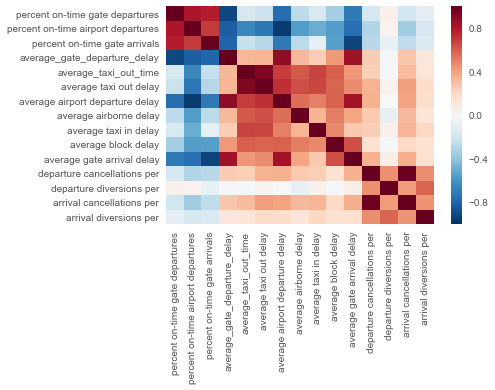

In [77]:
# let's check some correlations... since these are all delay metrics....
sns.heatmap(sub_ss.corr())


In [78]:
# these are high!  let's PCA it...
pca = PCA()
sub_pca = pca.fit_transform(sub_ss)

In [79]:
np.cumsum(pca.explained_variance_ratio_) # almost 80% in three dimensions!  bodes well for being able to see my clusters...

array([ 0.47964929,  0.64332213,  0.78140403,  0.83880987,  0.88507978,
        0.92368634,  0.9520432 ,  0.97302802,  0.9842285 ,  0.99356729,
        0.99783645,  0.99903143,  0.99961017,  0.9999362 ,  1.        ])

In [80]:
# let's cluster in PCA space, with all the features
db = DBSCAN(eps = 1.0, min_samples=3)
db.fit(sub_pca)

DBSCAN(algorithm='auto', eps=1.0, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [81]:
db.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  1,  1,  0,  0, -1,  2, -1, -1, -1, -1,  2,  2, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0, 15, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, 19,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       19, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [82]:
sum([1 for i in db.labels_ if i ==-1]) 

487

In [83]:
silhouette_score(sub_pca, db.labels_)

-0.32901477042279431

In [84]:
# i'll write an algo to vary eps and min_samples, and check number of clusters, proportions in each, and silhouette...


def db_fitter(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(sub_pca)
    return (eps, min_samples, len(set(db.labels_))-1, sum([1 for i in db.labels_ if i ==-1]) /num_samples, silhouette_score(sub_pca, db.labels_))
    

eps_range = [i/10 for i in range(10,26,2)]
min_samples_range = range(2,20,2)
num_samples = len(sub_pca)


results = []
for e in eps_range:
    for s in min_samples_range:
        results.append(db_fitter(e, s))

In [85]:
results_df = pd.DataFrame(results, columns = ['eps', 'min_s', 'num_clusters', 'prop_noise', 'sil'])
results_df.sort_values(['sil', 'prop_noise'], ascending=False).head()

,eps,min_s,num_clusters,prop_noise,sil
64,2.4,4,2,0.046308,0.480245
68,2.4,12,1,0.118899,0.466340
69,2.4,14,1,0.135169,0.448652
70,2.4,16,1,0.138924,0.446311
71,2.4,18,1,0.142678,0.443731


In [86]:
# i want a reasonable number of clusters and high silhouette so i'll pick eps 2.4 and min_s 4
db = DBSCAN(eps = 2.4, min_samples=4)
db.fit(sub_pca)

from collections import Counter
Counter(db.labels_)

Counter({-1: 37, 0: 759, 1: 3})

In [87]:
# only three airport years look unique!  i'm guessing these are the really bad ones...
df[db.labels_==1]

,airport,year,departure cancellations,arrival cancellations,departure diversions,arrival diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,alias,facility type,faa region,county,city,state,ap type,latitude,longitude,boundary data available
221,EWR,2005,4622.0,4696.0,317.0,472.0,211790,209551,0.7421,0.5255,...,Newark Liberty Int'l Airport,Airport,AEA,ESSEX,NEWARK,NJ,Federalized/Commercial,40.69250,-74.168667,Yes
365,LGA,2006,4718.0,4668.0,278.0,537.0,196274,196378,0.7398,0.5213,...,Laguardia Airport,Airport,AEA,QUEENS,NEW YORK,NY,Federalized/Commercial,40.77725,-73.872611,Yes
367,LGA,2008,5753.0,5721.0,270.0,701.0,186037,186204,0.7458,0.4705,...,Laguardia Airport,Airport,AEA,QUEENS,NEW YORK,NY,Federalized/Commercial,40.77725,-73.872611,Yes


In [88]:
# this is ok but not terribly interesting.  i have lots of noise, and only two groups, one of which is just 
# EWR and LGA.  

In [89]:
# let's try KMEANS

# use kmeans clustering.  test 2 to 9 clusters, to determine highest silhouette score
for n in range (2,10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(sub_pca)
    print n, silhouette_score(sub_pca,kmeans.labels_)
    


2 0.360836090622
3 0.205925450168
4 0.217739269793
5 0.21351863346
6 0.187554096702
7 0.183110572618
8 0.173081757252
9 0.1712835315


In [90]:
# 2 clusters provide highest silhouette score
kmeans = KMeans(n_clusters=2)
kmeans.fit(sub_pca)
print Counter(kmeans.labels_)
df[kmeans.labels_==0]

Counter({0: 619, 1: 180})


,airport,year,departure cancellations,arrival cancellations,departure diversions,arrival diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,alias,facility type,faa region,county,city,state,ap type,latitude,longitude,boundary data available
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
5,ABQ,2009,192.0,162.0,74.0,26.0,42550,42704,0.8341,0.8147,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
6,ABQ,2010,222.0,177.0,71.0,50.0,42302,42169,0.8144,0.7907,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
7,ABQ,2011,345.0,294.0,77.0,61.0,42283,42297,0.8072,0.7758,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
8,ABQ,2012,237.0,181.0,65.0,60.0,39105,39107,0.8219,0.7940,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
9,ABQ,2013,232.0,212.0,62.0,46.0,35277,34989,0.7710,0.7402,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [91]:
# try hierarchical

Z = linkage(sub_pca, 'single')
c, coph_dists = cophenet(Z, pdist(sub_pca))
print c

Z = linkage(sub_pca, 'complete')
c, coph_dists = cophenet(Z, pdist(sub_pca))
print c
Z = linkage(sub_pca, 'average')
c, coph_dists = cophenet(Z, pdist(sub_pca))
print c
Z = linkage(sub_pca, 'ward')
c, coph_dists = cophenet(Z, pdist(sub_pca))
print c

0.762083823147
0.717673048024
0.83837971704
0.586540801157


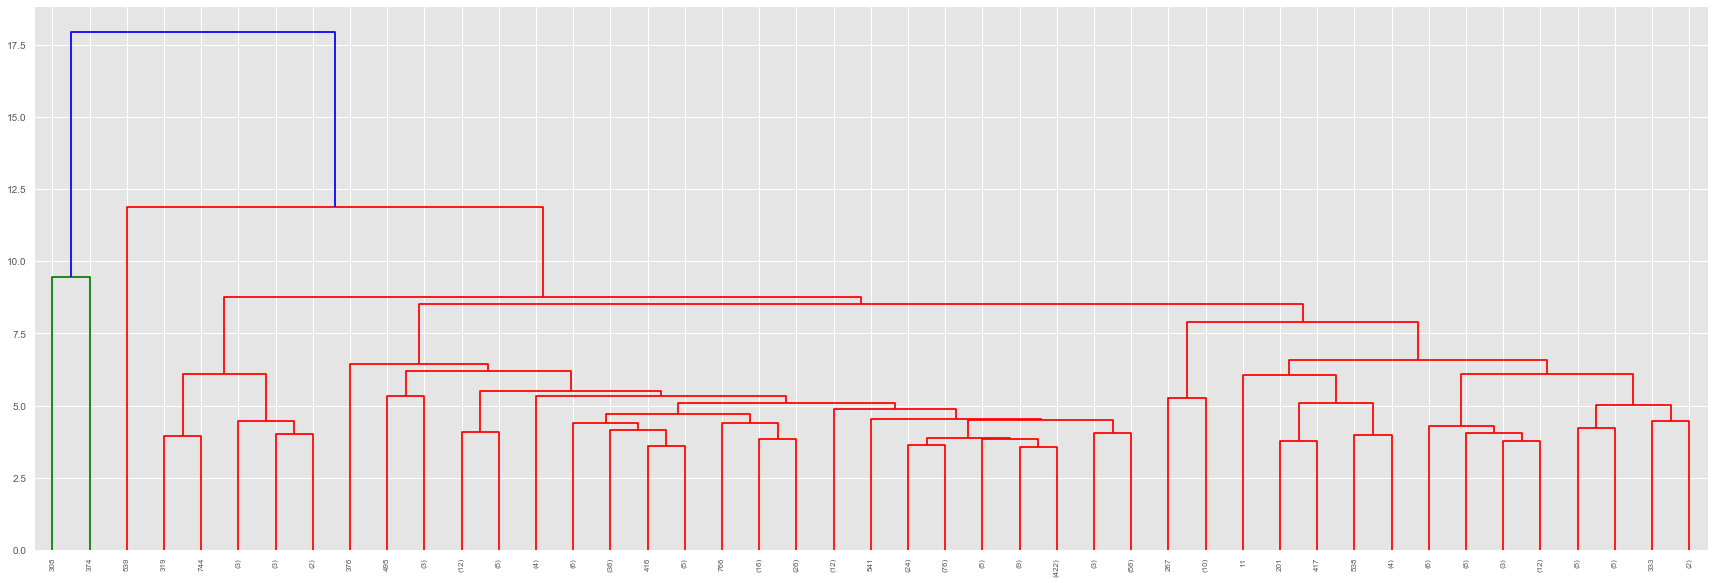

In [92]:
# average gives highest CCC so i'll try that
Z = linkage(sub_pca, 'average')
plt.figure(figsize=(30, 10))
dendrogram(
    Z, p=45,
    leaf_rotation=90.,  
    leaf_font_size=8.,
truncate_mode = 'lastp')
plt.show()

In [93]:
# test silhouette score for different cuts
for max_d in range(2,18,2):
    clusters = fcluster(Z, max_d, criterion='distance')
    print max_d, silhouette_score(sub_pca,clusters)

2 0.154705063084
4 0.12972388198
6 0.299506601461
8 0.470444003592
10 0.602166715421
12 0.733326936536
14 0.733326936536
16 0.733326936536


In [94]:
# 2 clusters is giving highest silhouette and it's much higher than dbscan and kmeans

clusters = fcluster(Z, 12, criterion='distance')
Counter(clusters) # but again so few in the smaller cluster

Counter({1: 2, 2: 797})

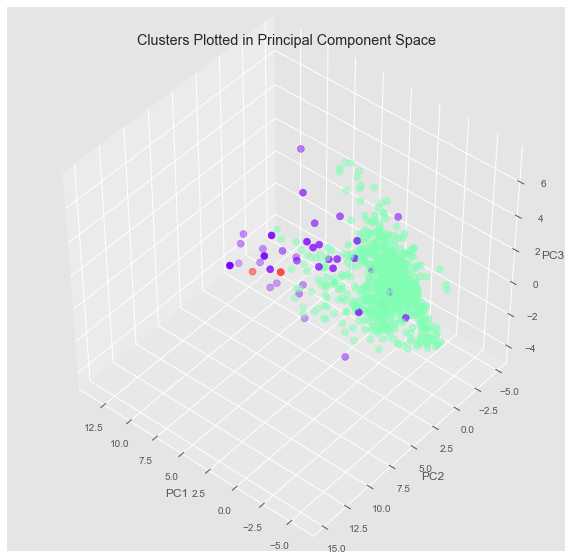

In [95]:
# let's plot dbscan in the first three PCs

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Clusters Plotted in Principal Component Space")
ax.scatter(sub_pca[:,0], sub_pca[:,1],sub_pca[:,2],c=db.labels_, cmap='rainbow',s=50)
ax.set(xlabel="PC1", ylabel = "PC2", zlabel="PC3")
ax.view_init(45, 130)
plt.draw()

In [96]:
# it's hard to see anything different between the noise and clusters...

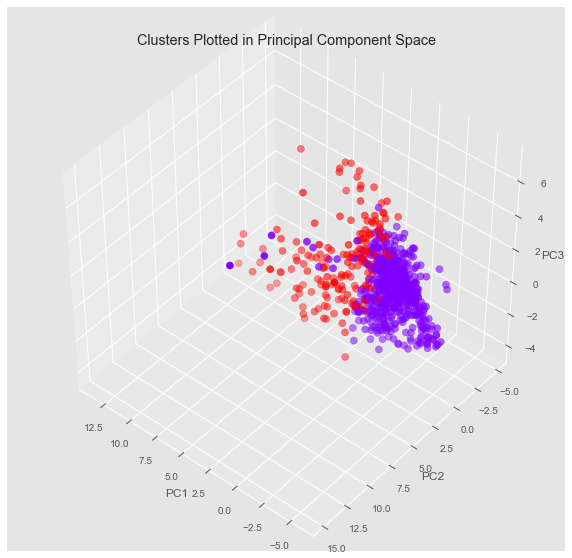

In [97]:
# let's plot dbscan in the first three PCs

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Clusters Plotted in Principal Component Space")
ax.scatter(sub_pca[:,0], sub_pca[:,1],sub_pca[:,2],c=kmeans.labels_, cmap='rainbow',s=50)
ax.set(xlabel="PC1", ylabel = "PC2", zlabel="PC3")
ax.view_init(45, 130)
plt.draw()

In [98]:
# this is more interesting!  so let's look at these clusters

In [99]:
#let's add the labels, airport names and years into the df
sub['labels'] = kmeans.labels_
sub['airport'] = df['airport']
sub['year'] = df['year']

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [101]:
# let's compare the mean values for the delay metrics for these two columns
compare = pd.concat([sub[sub["labels"]==0].describe().loc["mean",num_cols].to_frame(),\
sub[sub["labels"]==1].describe().loc["mean",num_cols].to_frame()],axis=1)
compare.columns = ['0', '1']
compare

,0,1
departure cancellations,825.381260,2929.116667
arrival cancellations,841.655897,3058.494444
departure diversions,141.778675,285.916667
arrival diversions,116.063005,356.622222
departures for metric computation,93701.644588,181458.138889
arrivals for metric computation,93386.684976,180465.588889
percent on-time gate departures,0.794515,0.726192
percent on-time airport departures,0.755930,0.627326
percent on-time gate arrivals,0.782205,0.714109
average_gate_departure_delay,11.857658,16.441222


In [102]:
# comparing the mean between clusters, cluster 1 is clearly the bad one!  it's also the busy airports.  not surprising.
compare['ratio'] = compare['0'] / compare['1']
compare

,0,1,ratio
departure cancellations,825.381260,2929.116667,0.281785
arrival cancellations,841.655897,3058.494444,0.275186
departure diversions,141.778675,285.916667,0.495874
arrival diversions,116.063005,356.622222,0.325451
departures for metric computation,93701.644588,181458.138889,0.516382
arrivals for metric computation,93386.684976,180465.588889,0.517476
percent on-time gate departures,0.794515,0.726192,1.094084
percent on-time airport departures,0.755930,0.627326,1.205003
percent on-time gate arrivals,0.782205,0.714109,1.095357
average_gate_departure_delay,11.857658,16.441222,0.721215


In [103]:
# they are the busiest airports!  but also, taxi in / out delay is where they are really lagging
# so to improve them, this is what the ops should focus on

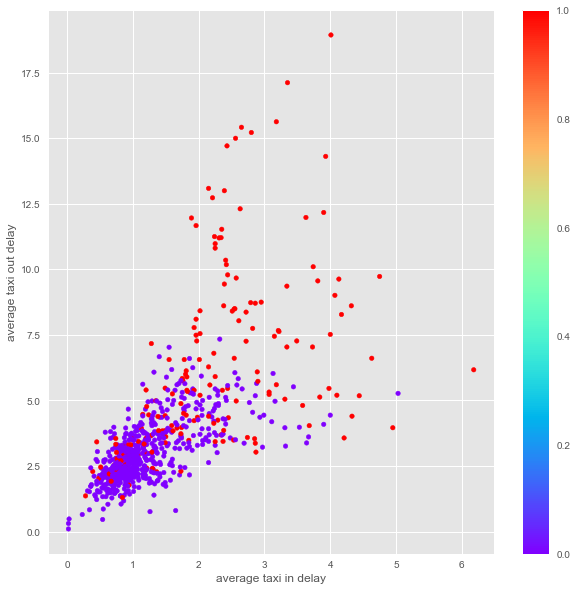

In [104]:
# let's see how those two metrics 
fig, ax = plt.subplots(figsize=(10,10))
sub.plot(x='average taxi in delay', y='average taxi out delay', kind='scatter', ax=ax, c=kmeans.labels_, cmap=cm.rainbow)

In [105]:
# we have data for each airport over roughly 7 years. let's see which airports are always good!  
# and always bad.  and maybe move between clusters
bad = []
good = []
movers = []
for ap in set(sub['airport']):
    perf = sub[sub['airport']==ap]['labels'].mean()
    if perf ==0:
        good.append(ap)
    elif perf ==1:
        bad.append(ap)
    else:
        movers.append(ap)

In [106]:
print good

['TUS', 'MSY', 'OAK', 'HNL', 'SJC', 'CVG', 'SAN', 'BUR', 'SEA', 'CLE', 'DAY', 'ONT', 'SAT', 'ISP', 'JAX', 'PDX', 'STL', 'BDL', 'OXR', 'SJU', 'ABQ', 'AUS', 'RFD', 'BNA', 'SLC', 'MCO', 'SMF', 'BHM', 'MCI', 'LGB', 'PIT', 'PHX', 'TPA', 'PSP', 'OGG', 'RSW']


In [107]:
print bad # ha!  not surprising.  all NY based...

['JFK', 'HPN', 'EWR', 'LGA']


In [108]:
print movers

['MKE', 'MIA', 'ATL', 'BOS', 'MSP', 'FLL', 'DEN', 'SNA', 'DTW', 'MHT', 'SWF', 'SFO', 'DCA', 'PVD', 'IAD', 'BWI', 'PHL', 'BUF', 'RDU', 'IAH', 'DFW', 'HOU', 'CLT', 'MEM', 'PBI', 'ORD', 'OMA', 'ANC', 'MDW', 'DAL', 'SDF', 'LAX', 'IND', 'LAS']


In [109]:
# for these movers, do any get better?  maybe they can be examples of what to do.  
# let's find the ones that improved and never looked back
improvers = []
for ap in movers:
    flag = False
    sub_list =sub[sub['airport']==ap].sort_values('year')['labels'].values
    for i, j in enumerate(sub_list):
        if i == len(sub_list)-1:
            pass
        elif sub_list[i]>sub_list[i+1]:
            flag = True
        elif sub_list[i]<sub_list[i+1]:
            flag = False
            break
        else:
            pass
    if flag:
        improvers.append(ap)

In [110]:
pd.pivot_table(sub[sub['airport'].isin(improvers)], index='airport', columns='year', values='labels')

year,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
airport,,,,,,,,,,,
ANC,1,1,1,1,0,0,0,0,0,0,0
ATL,1,1,1,1,1,1,1,1,0,0,0
SNA,1,0,0,0,0,0,0,0,0,0,0


In [55]:
# learn from these guys!

## Conclusions

- ['JFK', 'HPN', 'EWR', 'LGA'] are the worst airpots - they are in the worse cluster for all years in the dataset
- they are also the busiest!
- the metrics where the worse cluster is most significantly worse is taxi in/out delay (so it's delays on the tarmac... not pushing off).  This might be because these airports are HUGE and taxiing takes forever.  Also maybe because if you miss your slot, you have to wait forever inline.
- ATL and ANC moved from bad to good.  ATL particularly was pretty stable as bad then moved to stable foor in 2012!  What did they do?  Maybe we can learn from them.  It is also HUGE so a good case study of how to improve